# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from api_keys import weather_api_key
from api_keys import g_key


from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"  # "imperial" for Farenheit; "metric" for Celsius



# Build partial query URL
#query_url = base_url + "appid=" + weather_api_key + "&q=" + cityx
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#create lists
x_city=[]
x_cloudiness=[]
x_country=[]
x_date=[]
x_humidity=[]
x_latitude=[]
x_longitude=[]
x_max_temp=[]
x_wind_speed=[]
record = 0
set = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------------------------")
for index in cities: #[0:50]:   #https://samples.openweathermap.org/data/2.5/find?q=London&units=metric&appid=439d4b804bc8187953eb36d2a8c26a02
    
    response = requests.get(query_url + index).json() #index is city name, passing to url
    
    try:
        x_city.append(index)
        x_cloudiness.append(response['clouds']['all'])
        x_country.append(response['sys']['country'])
        x_date.append(response['dt'])
        x_humidity.append(response['main']['humidity'])
        x_latitude.append(response['coord']['lat'])
        x_longitude.append(response['coord']['lon'])
        x_max_temp.append(response['main']['temp_max'])
        x_wind_speed.append(response['wind']['speed'])
        print(f"Processing Record {record} of Set {set} | {index}") #*************Count Set********************
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    record += 1
set += 1
print(f"------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------")



# for p in x_city:
#      print(p)
    
    
    

Beginning Data Retrieval
-------------------------------------------------
Processing Record 0 of Set 1 | kahului
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | yulara
Processing Record 6 of Set 1 | chikwawa
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | alyangula
Processing Record 10 of Set 1 | kutum
Processing Record 11 of Set 1 | hobyo
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | wencheng
Processing Record 17 of Set 1 | pangnirtung
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | takhtamygda
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | castro
Proce

Processing Record 198 of Set 1 | hvolsvollur
Processing Record 199 of Set 1 | nabire
Processing Record 200 of Set 1 | waipawa
Processing Record 201 of Set 1 | takoradi
Processing Record 202 of Set 1 | karratha
Processing Record 203 of Set 1 | tateyama
Processing Record 204 of Set 1 | agropoli
Processing Record 205 of Set 1 | hambantota
Processing Record 206 of Set 1 | komsomolets
Processing Record 207 of Set 1 | yerofey pavlovich
City not found. Skipping...
Processing Record 209 of Set 1 | maragogi
Processing Record 210 of Set 1 | sao felix do xingu
Processing Record 211 of Set 1 | severo-kurilsk
Processing Record 212 of Set 1 | ambilobe
Processing Record 213 of Set 1 | vigia del fuerte
Processing Record 214 of Set 1 | mackenzie
Processing Record 215 of Set 1 | shenjiamen
Processing Record 216 of Set 1 | namatanai
Processing Record 217 of Set 1 | isangel
City not found. Skipping...
Processing Record 219 of Set 1 | antoing
City not found. Skipping...
Processing Record 221 of Set 1 | nar

Processing Record 395 of Set 1 | quatre cocos
City not found. Skipping...
Processing Record 397 of Set 1 | tucupita
Processing Record 398 of Set 1 | mecca
Processing Record 399 of Set 1 | makakilo city
Processing Record 400 of Set 1 | eyl
Processing Record 401 of Set 1 | henties bay
Processing Record 402 of Set 1 | kambove
Processing Record 403 of Set 1 | kangaatsiaq
Processing Record 404 of Set 1 | bay roberts
Processing Record 405 of Set 1 | airai
Processing Record 406 of Set 1 | vao
City not found. Skipping...
Processing Record 408 of Set 1 | along
Processing Record 409 of Set 1 | kamenka
Processing Record 410 of Set 1 | buchanan
Processing Record 411 of Set 1 | mayya
Processing Record 412 of Set 1 | dudinka
Processing Record 413 of Set 1 | hot springs
City not found. Skipping...
Processing Record 415 of Set 1 | thompson
Processing Record 416 of Set 1 | rolla
Processing Record 417 of Set 1 | teya
Processing Record 418 of Set 1 | marawi
City not found. Skipping...
Processing Record 4

Processing Record 596 of Set 1 | saldanha
Processing Record 597 of Set 1 | ghanzi
City not found. Skipping...
Processing Record 599 of Set 1 | awjilah
Processing Record 600 of Set 1 | olinda
Processing Record 601 of Set 1 | san quintin
City not found. Skipping...
Processing Record 603 of Set 1 | abonnema
Processing Record 604 of Set 1 | yamada
Processing Record 605 of Set 1 | larap
Processing Record 606 of Set 1 | aykhal
Processing Record 607 of Set 1 | monrovia
Processing Record 608 of Set 1 | shieli
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
weather_df = {
#  "City": x_city,         #   *************Error on x_city************                  
    "Cloudiness": x_cloudiness,
    "Country": x_country,
    "Date": x_date,
    "Humidity": x_humidity,
    "Lat": x_latitude,
    "Lng": x_longitude,
    "Max Temp": x_max_temp,
    "Wind Speed": x_wind_speed
}
weather_data = pd.DataFrame(weather_df)
weather_data.count()



Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

In [21]:
weather_data.to_csv("Output/city.csv", encoding="utf-8", index=False) #Export cit dataframe to cvs 
weather_data

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,40,US,1586833936,58,20.89,-156.47,84.20,6.93
1,69,CK,1586833881,74,-21.21,-159.78,78.80,5.82
2,90,US,1586833886,53,42.60,-73.97,53.01,8.05
3,20,ZA,1586833583,87,-33.93,18.42,55.99,5.82
4,31,AU,1586833645,34,-33.65,115.33,73.99,3.60
...,...,...,...,...,...,...,...,...
565,45,JP,1586834299,53,39.47,141.95,48.69,14.65
566,97,PH,1586834299,81,14.30,122.65,79.81,19.22
567,91,RU,1586833959,45,66.00,111.50,42.80,8.95
568,54,LR,1586834299,85,6.30,-10.80,80.20,4.72


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

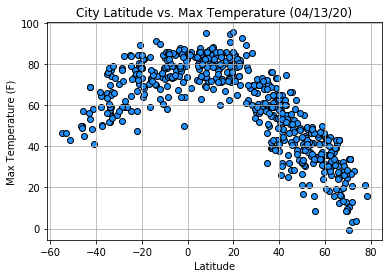

In [22]:
# Build a scatter plot for City Latitude vs. Max Temperature
now = datetime.datetime.now()
analysis_date= now.strftime("%m/%d/%y")

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",color='dodgerblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + " (" + str(analysis_date) + ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude vs. Temperature Plot.png")

# Show plot
plt.show()



#### Latitude vs. Humidity Plot

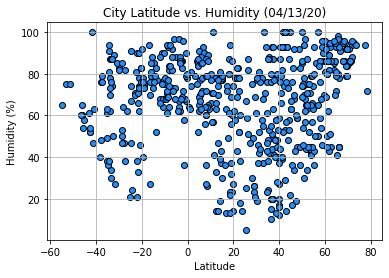

In [23]:
# Build a scatter plot for City Latitude vs. Humidity

plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",color='dodgerblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity" + " (" + str(analysis_date) + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

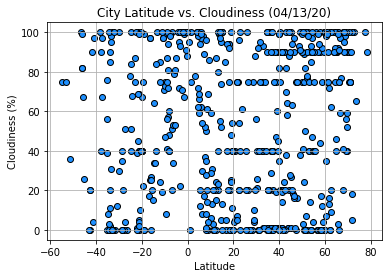

In [24]:
# Build a scatter plot for City Latitude vs. Cloudiness

plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",color='dodgerblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + " (" + str(analysis_date) + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude vs. Cloudiness Plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

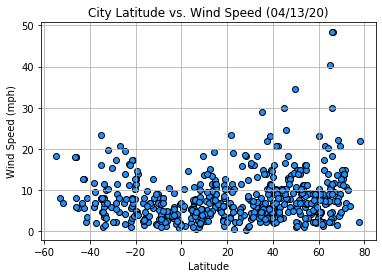

In [25]:
# Build a scatter plot for City Latitude vs. Wind Speed

plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",color='dodgerblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + " (" + str(analysis_date) + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = (weather_data[weather_data['Lat'] >= 0])

southern_df = (weather_data[weather_data['Lat'] < 0])
southern_df

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,69,CK,1586833881,74,-21.21,-159.78,78.80,5.82
3,20,ZA,1586833583,87,-33.93,18.42,55.99,5.82
4,31,AU,1586833645,34,-33.65,115.33,73.99,3.60
5,78,AU,1586833879,21,-25.24,130.99,84.20,6.93
6,27,MW,1586834211,79,-16.03,34.80,73.09,3.18
...,...,...,...,...,...,...,...,...
557,56,ID,1586834296,72,-9.11,124.89,81.77,3.00
558,100,BR,1586834296,96,-2.10,-56.49,71.33,2.44
559,0,ZA,1586833917,87,-33.01,17.94,53.60,3.36
560,69,BW,1586834297,33,-21.57,21.78,72.30,7.81


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.798017294985494


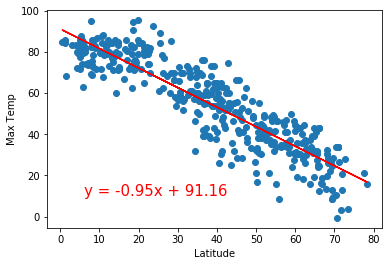

In [27]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.43002832198844176


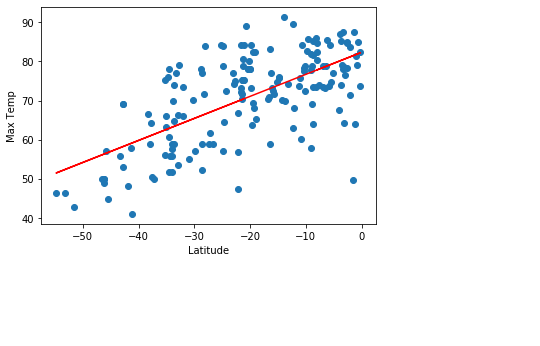

In [28]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06007603715010103


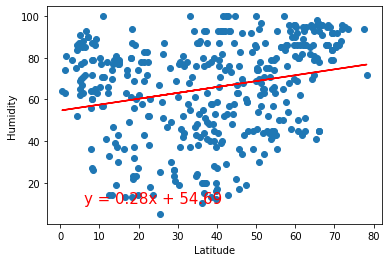

In [29]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09740017388338032


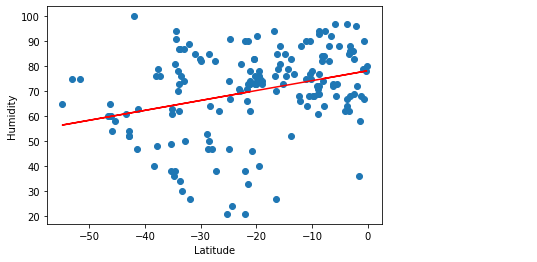

In [30]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()                                           #*******************y = ...not showing***********************


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03451433558940506


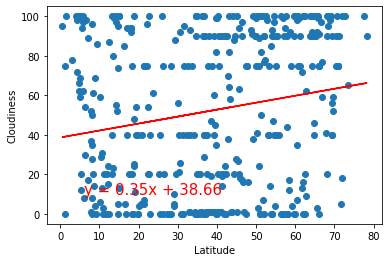

In [31]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()                                           

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08503010280024519


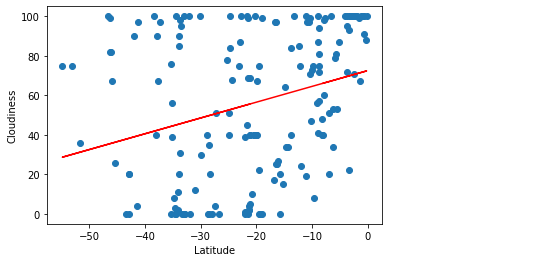

In [32]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #*******************y = ...not showing***********************
print(f"The r-squared is: {rvalue**2}") 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()        

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.049528773655315224


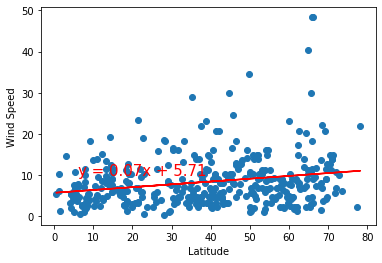

In [33]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}") 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()    

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17184223950723884


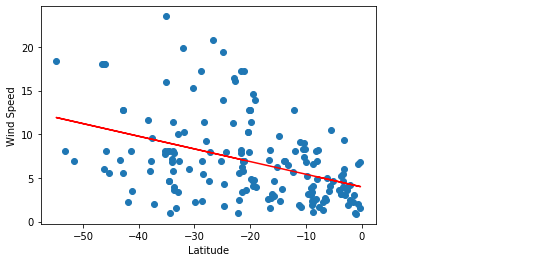

In [34]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #*******************y = ...not showing***********
print(f"The r-squared is: {rvalue**2}") 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()    